# Question 1: Occupation

Steps
<li>1. Import the necessary libraries </li>
<li>2. Import the dataset from this  <a href = https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user> address</a></li>
<li>3. Assign it to a variable called users</li>

In [4]:
import numpy as np #np is the standard convention for Numpy
import pandas as pd
import matplotlib.pyplot as pp # import matplolib for basic visuals
%matplotlib inline 

users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')
users.head()
users.set_index('user_id')

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


Steps
<li>4. Discover what is the mean age per occupation </li>
<li>5. Discover the Male ratio per occupation and sort it from the most to the least</li>
<li>6. For each occupation, calculate the minimum and maximum ages</li>
<li>7. For each combination of occupation and sex, calculate the mean age</li>
<li>8. For each occupation present the percentage of women and men</li>

In [11]:
#4 Discover what is the mean age per occupation

users.groupby('occupation')['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [66]:
#5 Discover the Male ratio per occupation and sort it from the most to the least

ratio_distr  = users.groupby(['occupation','gender'])['gender'].size().unstack(fill_value=0)
male_ratio = ratio_distr['M'] / ratio_distr['F']
print('male ratio distribution per occupation is displayed below:')
print(male_ratio)

male ratio distribution per occupation is dosplayed below:
occupation
administrator     1.194444
artist            1.153846
doctor                 inf
educator          2.653846
engineer         32.500000
entertainment     8.000000
executive         9.666667
healthcare        0.454545
homemaker         0.166667
lawyer            5.000000
librarian         0.758621
marketing         1.600000
none              1.250000
other             1.916667
programmer       10.000000
retired          13.000000
salesman          3.000000
scientist         9.333333
student           2.266667
technician       26.000000
writer            1.368421
dtype: float64


In [15]:
#6 For each occupation, calculate the minimum and maximum ages

users.groupby('occupation')['age'].agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [22]:
#7 For each combination of occupation and sex, calculate the mean age
users.groupby(['occupation','gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [35]:
#8 For each occupation present the percentage of women and men
count_per_gender = users.groupby(['occupation','gender'])['gender'].size().unstack(fill_value=0)
gender_distr_per_occupation = count_per_gender.div(count_per_gender.sum(axis=1), axis=0) * 100
print(gender_distr_per_occupation)

gender                 F           M
occupation                          
administrator  45.569620   54.430380
artist         46.428571   53.571429
doctor          0.000000  100.000000
educator       27.368421   72.631579
engineer        2.985075   97.014925
entertainment  11.111111   88.888889
executive       9.375000   90.625000
healthcare     68.750000   31.250000
homemaker      85.714286   14.285714
lawyer         16.666667   83.333333
librarian      56.862745   43.137255
marketing      38.461538   61.538462
none           44.444444   55.555556
other          34.285714   65.714286
programmer      9.090909   90.909091
retired         7.142857   92.857143
salesman       25.000000   75.000000
scientist       9.677419   90.322581
student        30.612245   69.387755
technician      3.703704   96.296296
writer         42.222222   57.777778


# Question 2 : Euro Teams

Steps
<li>1. Import the necessary libraries</li> 
<li>2. Import the dataset from this<a href = https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv > address</a> </li> 
<li>3. Assign it to a variable called euro12</li> 
<li>4. Select only the Goal column</li> 

In [42]:
import numpy as np #np is the standard convention for Numpy
import pandas as pd
import matplotlib.pyplot as pp # import matplolib for basic visuals
%matplotlib inline 


euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv', sep=',')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [118]:
goal_col = euro12['Goals'] # Goal column selected
goal_col

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Steps
<li>5. How many team participated in the Euro2012?</li> 
<li>6. What is the number of columns in the dataset?</li> 
<li>7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline</li>

In [51]:
# 5. How many team participated in the Euro2012?
Team_count = euro12['Team'].agg('count')
print('Number of teams in Euro 2012 was', Team_count)

Number of teams in Euro 2012 was 16


In [57]:
# 6. What is the number of columns in the dataset?

row_size,col_size = euro12.shape
print(f'The dataset has {col_size} columns')

The dataset has 35 columns


In [61]:
# 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline.head(15)

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


steps
<li>8. Sort the teams by Red Cards, then to Yellow Cards</li> 
<li>9. Calculate the mean Yellow Cards given per Team</li> 
<li>10. Filter teams that scored more than 6 goals</li> 
<li>11. Select the teams that start with G</li> 

In [85]:
# 8. Sort the teams by Red Cards, then to Yellow Cards
discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[True, True])


,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [77]:
# 9. Calculate the mean Yellow Cards given per Team
euro12.groupby(['Team'])['Yellow Cards'].mean()

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [84]:
# 10. Filter teams that scored more than 6 goals

euro12[euro12['Goals'] > 6]


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [86]:
# 11. Select the teams that start with G
euro12[euro12['Team'].str.startswith('G', na=False)]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


Steps
<li>12. Select the first 7 columns</li>
<li>13. Select all columns except the last 3</li> 
<li>14. Present only the Shooting Accuracy from England, Italy 

In [89]:
# 12. Select the first 7 columns
euro12.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [91]:
# 13. Select all columns except the last 3
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [116]:
# 14. Present only the Shooting Accuracy from England, Italy and Russia 

shot_accuracy = euro12['Shooting Accuracy']
shot_accuracy.loc[euro12['Team'].isin(['England','Italy','Russia'])]  # filter onlt England and Italy    


3     50.0%
7     43.0%
12    22.5%
Name: Shooting Accuracy, dtype: object

# Question 3 : Housing

Steps
<p>1. Import the necessary libraries<p>
<p>2. Create 3 differents Series, each of length 100, as follows: </p>
    <li> The first a random number from 1 to 4</li>
    <li> The second a random number from 1 to 3</li>
    <li> The third a random number from 10,000 to 30,000</li>





In [125]:
#Import the necessary libraries

import numpy as np

# Create 3 differents Series, each of length 100, as follows:
# a. The first a random number from 1 to 4
# b. The second a random number from 1 to 3
# c. The third a random number from 10,000 to 30,000
rand_set1 = np.linspace(1, 4, 100)
rand_set2 = np.linspace(1, 3, 100)
rand_set3 = np.linspace(10000, 30000, 100)

print(rand_set1)
print(rand_set2)
print(rand_set3)

[1.         1.03030303 1.06060606 1.09090909 1.12121212 1.15151515
 1.18181818 1.21212121 1.24242424 1.27272727 1.3030303  1.33333333
 1.36363636 1.39393939 1.42424242 1.45454545 1.48484848 1.51515152
 1.54545455 1.57575758 1.60606061 1.63636364 1.66666667 1.6969697
 1.72727273 1.75757576 1.78787879 1.81818182 1.84848485 1.87878788
 1.90909091 1.93939394 1.96969697 2.         2.03030303 2.06060606
 2.09090909 2.12121212 2.15151515 2.18181818 2.21212121 2.24242424
 2.27272727 2.3030303  2.33333333 2.36363636 2.39393939 2.42424242
 2.45454545 2.48484848 2.51515152 2.54545455 2.57575758 2.60606061
 2.63636364 2.66666667 2.6969697  2.72727273 2.75757576 2.78787879
 2.81818182 2.84848485 2.87878788 2.90909091 2.93939394 2.96969697
 3.         3.03030303 3.06060606 3.09090909 3.12121212 3.15151515
 3.18181818 3.21212121 3.24242424 3.27272727 3.3030303  3.33333333
 3.36363636 3.39393939 3.42424242 3.45454545 3.48484848 3.51515152
 3.54545455 3.57575758 3.60606061 3.63636364 3.66666667 3.69696

In [128]:
# 3. Create a DataFrame by joinning the Series by column

new_df = pd.DataFrame({'s1':rand_set1, 's2': rand_set2, 's3':rand_set3})
new_df

,s1,s2,s3
0,1.000000,1.000000,10000.000000
1,1.030303,1.020202,10202.020202
2,1.060606,1.040404,10404.040404
3,1.090909,1.060606,10606.060606
4,1.121212,1.080808,10808.080808
...,...,...,...
95,3.878788,2.919192,29191.919192
96,3.909091,2.939394,29393.939394
97,3.939394,2.959596,29595.959596
98,3.969697,2.979798,29797.979798


In [130]:
# 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

new_df = new_df.rename(columns={'s1': 'bedrs', 's2': 'bathrs', 's3': 'price_sqr_meter'})
new_df.head()

,bedrs,bathrs,price_sqr_meter
0,1.000000,1.000000,10000.000000
1,1.030303,1.020202,10202.020202
2,1.060606,1.040404,10404.040404
3,1.090909,1.060606,10606.060606
4,1.121212,1.080808,10808.080808


In [132]:
# 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
# Syteps 6 & 7 are handled by the reset_index method.

bigcolumn = new_df.stack().to_frame().reset_index(drop=True)
bigcolumn

,0
0,1.000000
1,1.000000
2,10000.000000
3,1.030303
4,1.020202
...,...
295,2.979798
296,29797.979798
297,4.000000
298,3.000000


# Question 4 : Wind Statistics

<p>The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.</p>

Steps
<p> 1. Import the necessary libraries</p>
<p> 2. Import the dataset from the attached file wind.txt</p>
<p> 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.</p>

In [199]:
#Import the necessary libraries
# 2. Import the dataset from the attached file wind.txt
import pandas as pd
import datetime

file_path = 'wind.txt'
data = pd.read_csv(file_path, sep = "\s+", parse_dates = [[0,1,2]]) 
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71


Steps
<p> 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.</p>
<p> 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].</p>
<p> 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.</p>
<p> 7. Compute how many non-missing values there are in total.</p>

# 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it

In [200]:


# function that uses datetime
def date_fix(x):
  year = x.year - 100 if x.year > 1989 else x.year
  return datetime.date(year, x.month, x.day)

# apply the function fix_century on the column and replace the values to the right ones
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(date_fix)

data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71


# 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [201]:
# set Yr_Mo_Dy data type to datetime64
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])

# set 'Yr_Mo_Dy' as the index
data = data.set_index('Yr_Mo_Dy')

data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71


In [203]:
# 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
data.isnull().sum()

RPT    0
VAL    1
ROS    0
KIL    0
SHA    1
BIR    0
DUB    0
CLA    1
MUL    0
CLO    0
BEL    0
MAL    0
dtype: int64

In [206]:
# 7. Compute how many non-missing values there are in total.
data.notnull().sum()

RPT    3
VAL    2
ROS    3
KIL    3
SHA    2
BIR    3
DUB    3
CLA    2
MUL    3
CLO    3
BEL    3
MAL    3
dtype: int64

Steps
<p> 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.</p>
<p> 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the daysA different set of numbers for each location.</p>
<p> 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day with a different set of numbers for each day.</p>
<p> 11. Find the average windspeed in January for each location.</p>
<p>Treat January 1961 and January 1962 both as January.</p>

In [208]:
#8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
data.sum().sum() / data.notna().sum().sum()

11.99878787878788

In [210]:
# 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

loc_stats_min_max = data.describe(percentiles=[])
loc_stats_min_max

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.00000
mean,16.083333,15.920000,12.110000,8.640000,11.895000,7.903333,12.140000,10.145000,9.706667,9.973333,16.263333,13.86000
std,2.099389,1.357645,1.185411,1.900289,1.025305,1.861003,1.330902,0.148492,1.167233,2.469015,3.080265,1.16529
min,14.710000,14.960000,10.830000,6.500000,11.170000,6.170000,11.250000,10.040000,8.500000,7.670000,12.750000,12.71000
50%,15.040000,15.920000,12.330000,9.290000,11.895000,7.670000,11.500000,10.145000,9.790000,9.670000,17.540000,13.83000
max,18.500000,16.880000,13.170000,10.130000,12.620000,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.04000


In [211]:
# 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day with a different set of numbers for each day.

day_stats = pd.DataFrame()

# this time we determine axis equals to one so it gets each row.
day_stats['min'] = data.min(axis = 1) # min
day_stats['max'] = data.max(axis = 1) # max 
day_stats['mean'] = data.mean(axis = 1) # mean
day_stats['std'] = data.std(axis = 1) # standard deviations

day_stats.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912


In [212]:
# 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

data.loc[data.index.month == 1].mean()

RPT    16.083333
VAL    15.920000
ROS    12.110000
KIL     8.640000
SHA    11.895000
BIR     7.903333
DUB    12.140000
CLA    10.145000
MUL     9.706667
CLO     9.973333
BEL    16.263333
MAL    13.860000
dtype: float64

Step

<p> 12. Downsample the record to a yearly frequency for each location.</p>
<p> 13. Downsample the record to a monthly frequency for each location.</p>
<p> 14. Downsample the record to a weekly frequency for each location.</p>
<p> 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each</p>

In [213]:
# 12. Downsample the record to a yearly frequency for each location
data.groupby(data.index.to_period('A')).mean()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,16.083333,15.92,12.11,8.64,11.895,7.903333,12.14,10.145,9.706667,9.973333,16.263333,13.86


In [214]:
# 13. Downsample the record to a monthly frequency for each location.
data.groupby(data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,16.083333,15.92,12.11,8.64,11.895,7.903333,12.14,10.145,9.706667,9.973333,16.263333,13.86


In [215]:
# 14. Downsample the record to a weekly frequency for each location.
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040,14.96,13.17,9.290,NaN,9.87,13.670,10.25,10.830,12.58,18.500,15.04
1961-01-02/1961-01-08,16.605,16.88,11.58,8.315,11.895,6.92,11.375,10.04,9.145,8.67,15.145,13.27


In [217]:
# 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each

# resample data to 'W' week 
weekly = data.resample('W').agg(['min','max','mean','std'])

# slice weekly data for the first 52 weeks and locations
weekly.loc[weekly.index[1:53], "RPT":"MAL"] .head()

RPT                            VAL                      ROS  \
              min   max    mean       std    min    max   mean std    min   
Yr_Mo_Dy                                                                    
1961-01-08  14.71  18.5  16.605  2.679935  16.88  16.88  16.88 NaN  10.83   

                   ...   CLO              BEL                             MAL  \
              max  ...  mean       std    min    max    mean       std    min   
Yr_Mo_Dy           ...                                                          
1961-01-08  12.33  ...  8.67  1.414214  12.75  17.54  15.145  3.387041  12.71   

                                   
              max   mean      std  
Yr_Mo_Dy                           
1961-01-08  13.83  13.27  0.79196  

[1 rows x 48 columns]

# Question 5

Steps
<p> 1. Import the necessary libraries
</p>
<p> 2. Import the dataset from this <a href=https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv>address</a>.
</p>
<p> 3. Assign it to a variable called chipo.
</p>
<p> 4. See the first 10 entries
</p>
<p> 5. What is the number of observations in the dataset?
</p>
<p> 6. What is the number of columns in the dataset?
</p>
<p> 7. Print the name of all the columns.
</p>
<p> 8. How is the dataset indexed?
</p>
<p> 9. Which was the most-ordered item?
</p>
<p> 10. For the most-ordered item, how many items were ordered?
</p>
<p> 11. What was the most ordered item in the choice_description column?
</p>
<p> 12. How many items were orderd in total?</p>

In [235]:
# 1. Import the necessary libraries 2. Import the dataset from this address. 3. Assign it to a variable called chipo.
# 4. See the first 10 entries

import pandas as pd
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [236]:
#  5. What is the number of observations in the dataset?
chipo.shape[0]

4622

In [237]:
# 6. What is the number of columns in the dataset?
chipo.shape[1]

5

In [238]:
# 7. Print the name of all the columns.
chipo.columns.values

array(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'], dtype=object)

In [239]:
# 8. How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [240]:
#  9. Which was the most-ordered item?
chipo.groupby(['item_name']).quantity.sum().sort_values(ascending = False).index[0]

'Chicken Bowl'

In [241]:
# Step 10. For the most-ordered item, how many items were ordered?
chipo.groupby(['item_name']).quantity.sum().sort_values(ascending = False).values[0]

761

In [242]:
# Step 11. What was the most ordered item in the choice_description column?
chipo.groupby(['choice_description']).quantity.sum().sort_values(ascending = False).index[0]

'[Diet Coke]'

In [243]:
# 12. How many items were orderd in total?
chipo.quantity.sum()

4972

Steps
<p> 13. Turn the item price into a float 
    
    a.Check the item price type
    b.Create a lambda function and change the type of item price
    c.Check the item price type
</p>
<p> 14. How much was the revenue for the period in the dataset?
</p>
<p> 15. How many orders were made in the period?
</p>
<p> 16. What is the average revenue amount per order?
</p>
<p> 17. How many different items are sold?</p>

In [244]:
# 13 Turn the item price into a float  13a Check the item price type
chipo.dtypes.item_price

dtype('O')

In [245]:
# 13b Create a lambda function and change the type of item price
chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:]))

# 13d Check the item price type
chipo.dtypes.item_price

dtype('float64')

In [246]:
# 14. How much was the revenue for the period in the dataset?
chipo['revenue'] = chipo['quantity']*chipo.item_price
tot_revenue = chipo.revenue.sum()
tot_revenue

39237.02

In [247]:
# 15. How many orders were made in the period?
tot_order = chipo.order_id.nunique()
tot_order

1834

In [248]:
# 16. What is the average revenue amount per order?
avg_revenue = tot_revenue / tot_order
print(avg_revenue)

21.39423118865867


In [249]:
# 17. How many different items are sold?
chipo.item_name.value_counts().count()

50

# Question 6

<p>Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!</p>

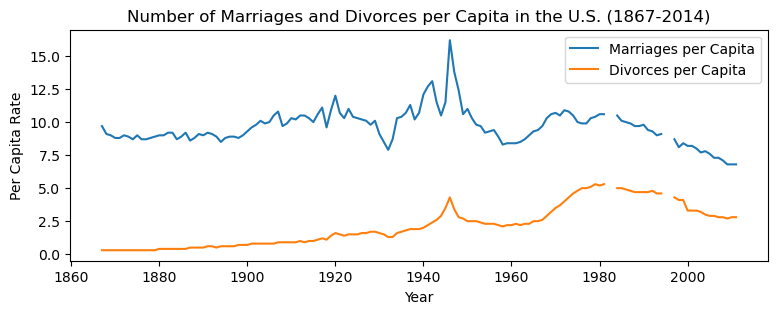

In [266]:
import matplotlib.pyplot as plt

us_marriage_divorce_data = pd.read_csv('data/us-marriages-divorces-1867-2014.csv')
years = us_marriage_divorce_data['Year'].values
marriages_per_capita = us_marriage_divorce_data['Marriages_per_1000'].values
divorces_per_capita = us_marriage_divorce_data['Divorces_per_1000'].values

# Plot the data
plt.figure(figsize=(9, 3))

plt.plot(us_marriage_divorce_data['Year'], marriages_per_capita, label='Marriages per Capita')
plt.plot(us_marriage_divorce_data['Year'], divorces_per_capita, label='Divorces per Capita')

# Add labels and legend
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.xlabel('Year')
plt.ylabel('Per Capita Rate')
plt.legend()

# Show the plot
plt.show()

# Question 7

<p>Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!</p>

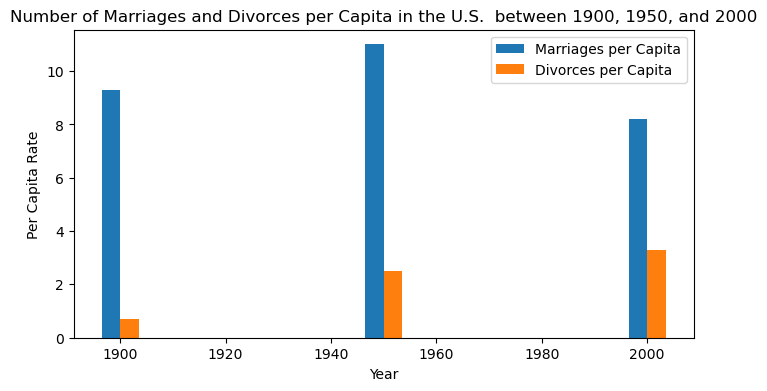

In [279]:
us_marriage_divorce_data = pd.read_csv('data/us-marriages-divorces-1867-2014.csv')
us_marriage_divorce_data = us_marriage_divorce_data[
    us_marriage_divorce_data['Year'].apply(lambda x: x in [1900, 1950, 2000])]

years = us_marriage_divorce_data['Year'].values
marriages_per_capita = us_marriage_divorce_data['Marriages_per_1000'].values
divorces_per_capita = us_marriage_divorce_data['Divorces_per_1000'].values

# Plot the data
bar_width = 3.5
plt.figure(figsize=(8, 4))

bar_pm = us_marriage_divorce_data['Year'] - bar_width / 2
bar_pd = us_marriage_divorce_data['Year'] + bar_width / 2

plt.bar(bar_pm, marriages_per_capita,width = bar_width, label='Marriages per Capita')
plt.bar(bar_pd, divorces_per_capita,width = bar_width, label='Divorces per Capita')

# Add labels and legend
plt.title('Number of Marriages and Divorces per Capita in the U.S.  between 1900, 1950, and 2000')
plt.xlabel('Year')
plt.ylabel('Per Capita Rate')
plt.legend()

# Show the plot
plt.show()

# Question 8


<p>Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!</p>

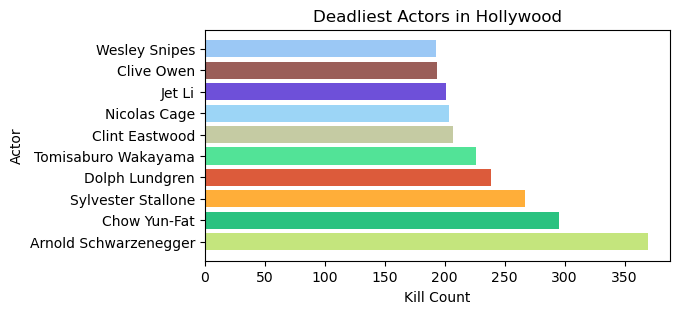

In [295]:
import pandas as pd

hw_actor_kills = pd.read_csv('data/actor_kill_counts.csv')

hw_actor_kills = hw_actor_kills.sort_values(by='Count', ascending=False)
actor_names = hw_actor_kills['Actor'].values
kill_counts = hw_actor_kills['Count'].values

# Plot the data
colours = ['#C4E57D','#2AC280','#FFAE39','#DC5B3B','#52E397',
           '#C5CBA3','#9CD5F6','#6E50D9','#9A5E59','#9BC8F5']

plt.figure(figsize=(6, 3))
bar_width = 0.5

plt.barh(actor_names, kill_counts, color=colours)

# Add labels and legend
# Add labels and title
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')


# Show the plot
plt.show()

# Question 9

<p>Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.</p>

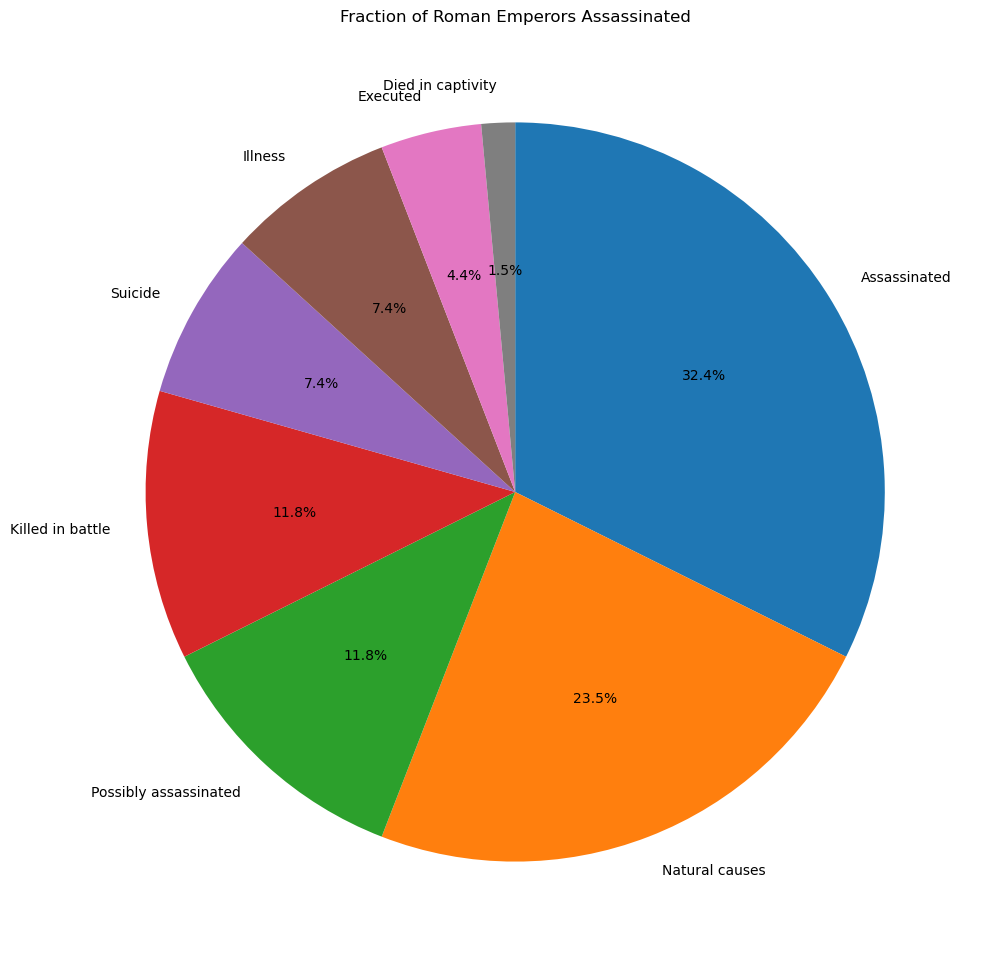

In [300]:
import pandas as pd
import matplotlib.pyplot as plt

roman_emperors = pd.read_csv('data/roman-emperor-reigns.csv')

# Count the occurrences of each outcome
outcome_counts = roman_emperors['Cause_of_Death'].value_counts()

# Plot the pie chart
plt.figure(figsize=(12, 12))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False)

# Add title
plt.title('Fraction of Roman Emperors Assassinated')

# Show the plot
plt.show()

# Question 10

<p>Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.</p>

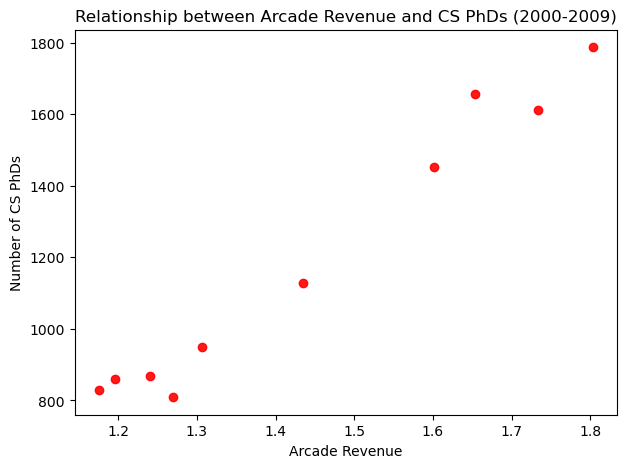

In [311]:
import pandas as pd
import matplotlib.pyplot as plt

arcade_rev_cs_drs = pd.read_csv('data/arcade-revenue-vs-cs-doctorates.csv')
arcade_rev = arcade_rev_cs_drs['Total Arcade Revenue (billions)'].values
cs_drs_awd = arcade_rev_cs_drs['Computer Science Doctorates Awarded (US)'].values

# Plot the scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(arcade_rev, cs_drs_awd, color='red', alpha=0.9)

# Add labels and title
plt.xlabel('Arcade Revenue')
plt.ylabel('Number of CS PhDs')
plt.title('Relationship between Arcade Revenue and CS PhDs (2000-2009)')

# Show the plot
plt.show()